# **หัวข้อเรื่อง** : ปัจจัยที่ส่งผลต่กการเลิกใช้บริการ (Customer Churn) ด้วย Logistic regression


### แรงบรรดาลใจในการเลือกหัวข้อนี้
เพื่อจะศึกษาพฤติกรรมลูกค้าว่ามีลักษณะเป็นเช่นไรเเละหาปัจจัยที่สำคัญที่ส่งผลต่อการเลิกใช้บริการ (Customer Churn) 


### คำถามที่น่าสนใจเกี่ยวกับปัญหา
- ลูกค้าที่อยู่กับเรา(เดือน)มีแนวโน้มที่จะเลิกใช้บริการหรือไม่
- ลูกค้าที่มีค่าบริการรายเดือนต่ำมีโอกาสที่จะเลิกใช้บริการหรือไม่
- ลูกค้าที่เป็นผู้สูงอายุมีแนวโน้มที่จะเลิกใช้บริการหรือไม่
- ลูกค้าที่มีผู้อุปการะมีแนวโน้มที่จะเลิกใช้บริการหรือไม่
- ลูกค้าที่มีหลาย Line มีแนวโน้มที่จะเลิกใช้บริการหรือไม่

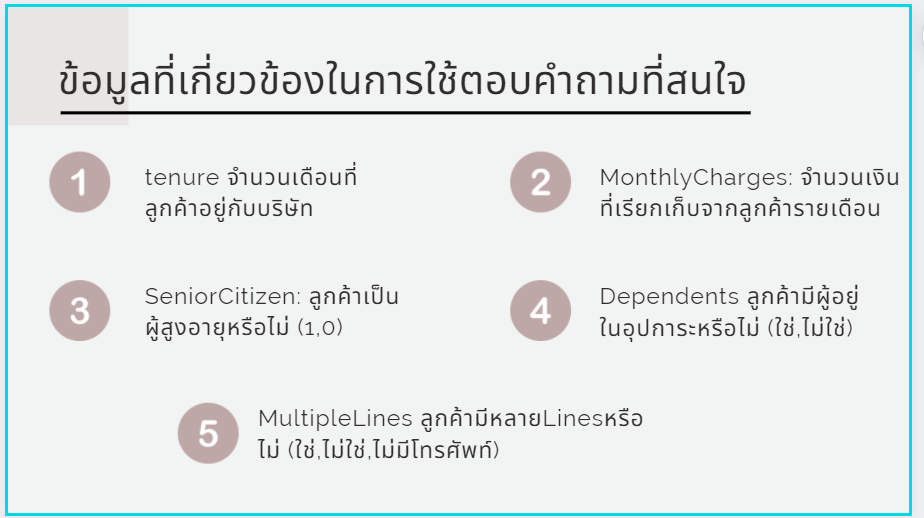

###  ข้อมูล : เเหล่งที่มา https://www.kaggle.com/blastchar/telco-customer-churn/notebooks

####ตัวเเปร
- customer ID: รหัสลูกค้า
- gender: ไม่ว่าลูกค้าจะเป็นชายหรือหญิง(0,1)
- SeniorCitizen: ลูกค้าเป็นผู้สูงอายุหรือไม่ (1, 0)
- Partner: ไม่ว่าลูกค้าจะมีหุ้นส่วนหรือไม่ (ใช่,ไม่ใช่)
- Dependents: ลูกค้ามีผู้อยู่ในอุปการะหรือไม่ (ใช่,ไม่ใช่)
- tenure: จำนวนเดือนที่ลูกค้าอยู่กับบริษัท
- PhoneService: ไม่ว่าลูกค้าจะมีบริการโทรศัพท์หรือไม่ (ใช่,ไม่ใช่)
- MultipleLines: ลูกค้ามีหลายLinesหรือไม่ (ใช่,ไม่ใช่,ไม่มีโทรศัพท์)
- InternetService: ผู้ให้บริการอินเทอร์เน็ตของลูกค้า (DSL, Fiber optic, No)
- OnlineSecurity: ลูกค้ามีความปลอดภัยทางออนไลน์หรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- OnlineBackup: ลูกค้ามีการสำรองข้อมูลออนไลน์หรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- DeviceProtection: ไม่ว่าลูกค้าจะมีการป้องกันอุปกรณ์หรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- TechSupport: ลูกค้ามีการสนับสนุนด้านเทคนิคหรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- StreamingTV: ไม่ว่าลูกค้าจะสตรีมทีวีหรือไม่(ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- StreamingMovies: ลูกค้ามีการสตรีมภาพยนตร์หรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- Contract : ระยะสัญญาของลูกค้า (เดือนต่อเดือนหนึ่งปีสองปี)
- PaperlessBilling: ลูกค้ามีการเรียกเก็บเงินแบบไม่ใช้กระดาษหรือไม่ (ใช่,ไม่ใช่)
- PaymentMethod: วิธีการชำระเงินของลูกค้า (เช็คอิเล็กทรอนิกส์,เช็คไปรษณีย์โอนเงิน,ผ่านธนาคาร (อัตโนมัติ) ,บัตรเครดิต (อัตโนมัติ))
- MonthlyCharges: จำนวนเงินที่เรียกเก็บจากลูกค้ารายเดือน
- TotalCharges: จำนวนเงินทั้งหมดที่เรียกเก็บจากลูกค้า
- Churn: ลูกค้าเลิกใช้บริการหรือไม่ (ใช่,ไม่)


### วัตถุประสงค์ : 


1.   เพื่อศึกษากระบวนการจำเเนกประเภทด้วยวิธี Logistic regression 
2.   เพื่อศึกษาความเเตกต่างเพศชาย เเละหญิงโดยการทดสอบสมมุติฐานทางสถิติ
3.   เพื่อศึกษาลูกค้าเเละวิเคราะห์ข้อมูล(EDA)


# Library

In [1]:
#pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")


from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from pycaret.classification import * 

# import Data

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')
df['SeniorCitizen'] = df['SeniorCitizen'].astype(np.object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA

## visualization

In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300537
std,24.559481,30.090047,2265.000244
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.350000,1400.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


In [11]:
df.describe(include=[object] )

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [12]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [13]:
df.drop(columns= ['customerID' , 'PhoneService'] , inplace=True)

Text(0.5, 1.0, 'Churn vs Non Churn')

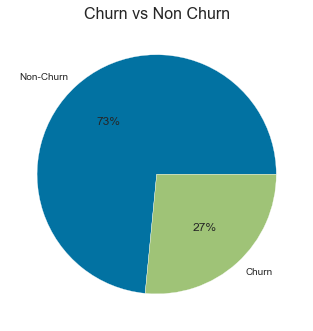

In [14]:
churn_rate = df.Churn.value_counts() / len(df.Churn)
labels = 'Non-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Churn vs Non Churn', fontsize=16)

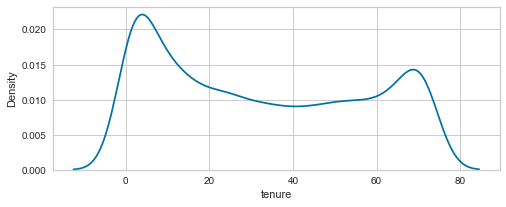

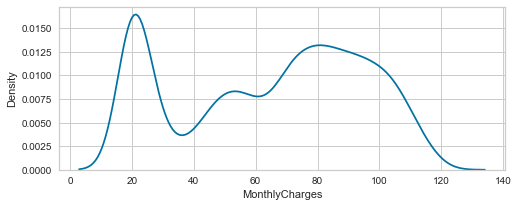

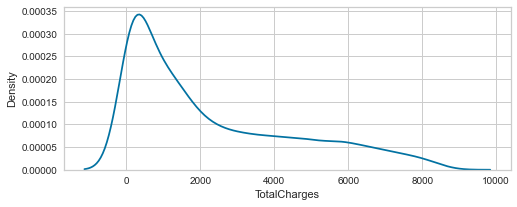

In [15]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(df[col])

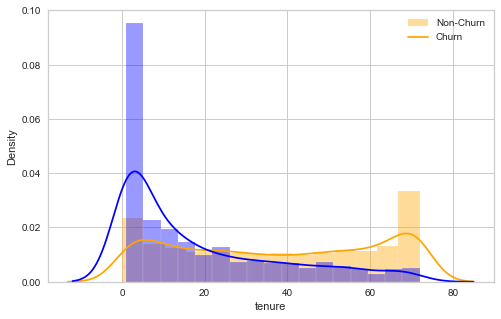

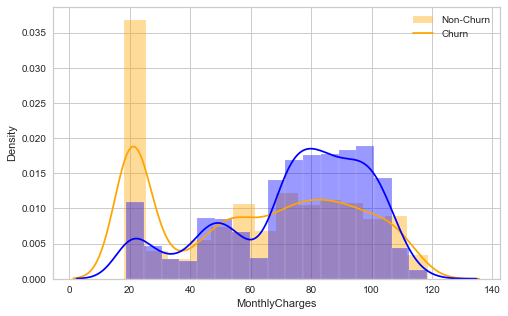

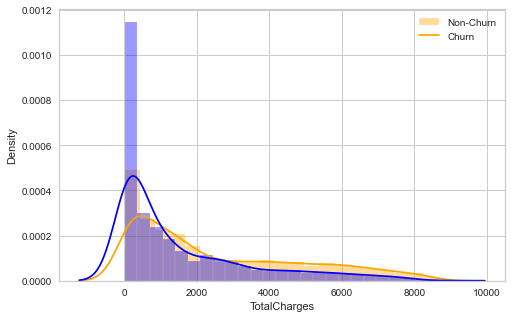

In [16]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,5))
    sns.distplot(df[df.Churn == 'No'][col],
                 color='orange',
                 label='Non-Churn',
                 kde=True)
    sns.distplot(df[df.Churn == 'Yes'][col],
                 color='blue',
                 label='Churn',
                 kde=True)
    plt.legend(labels)

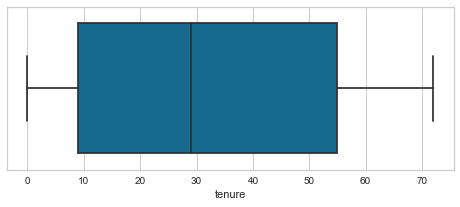

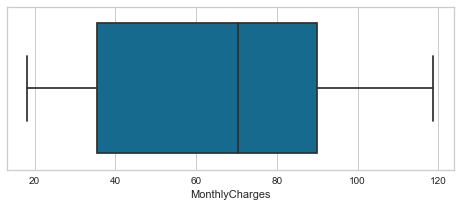

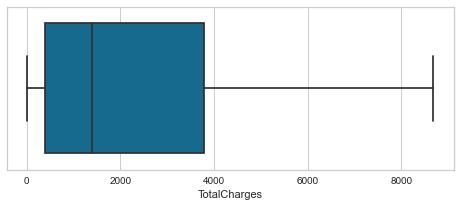

In [17]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(df[col])

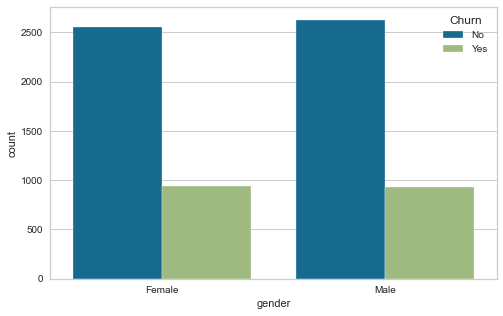

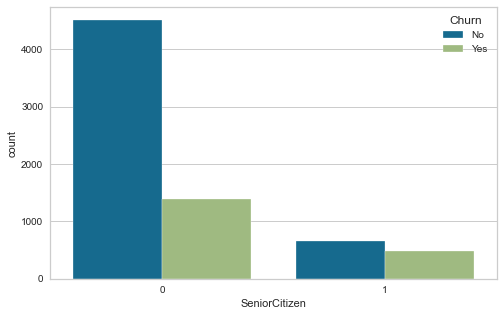

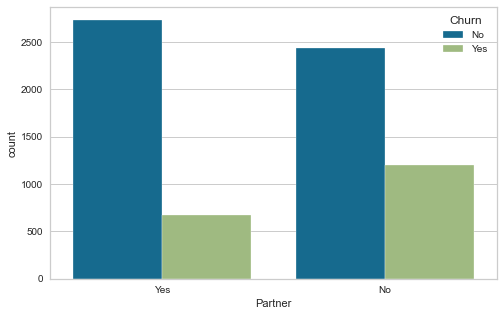

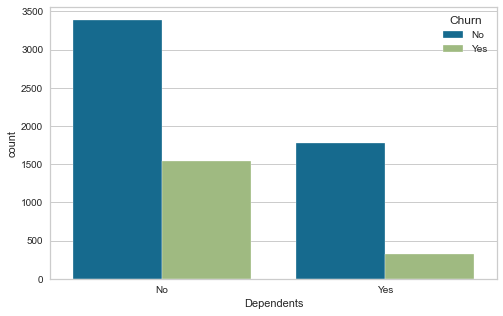

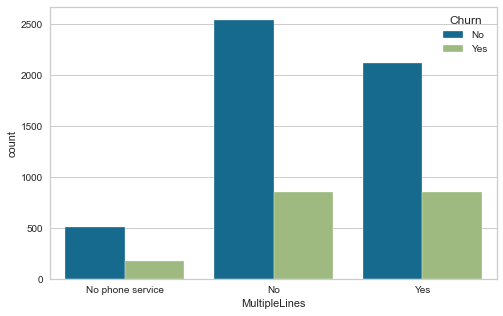

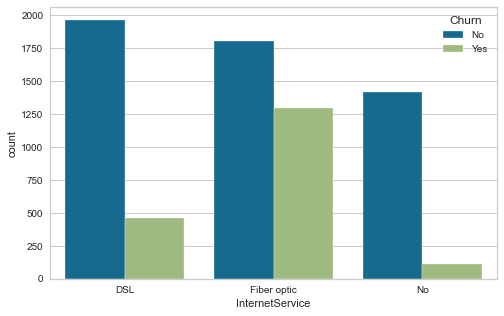

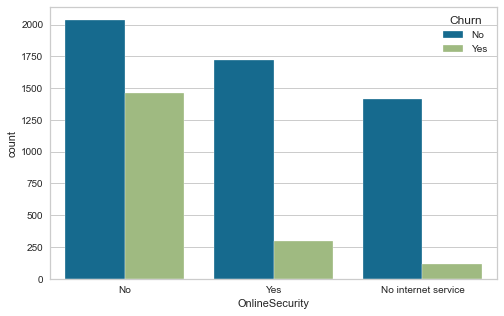

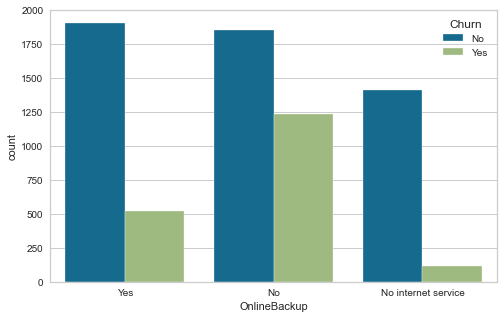

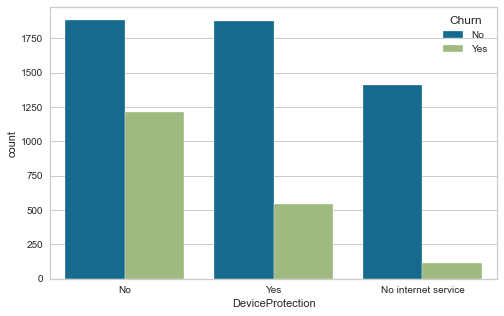

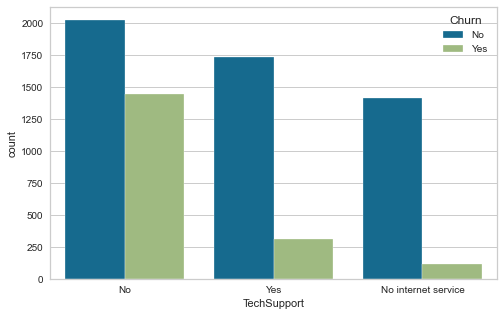

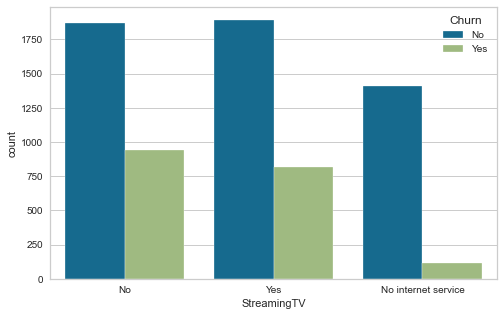

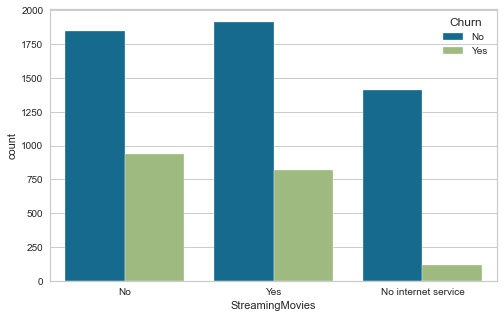

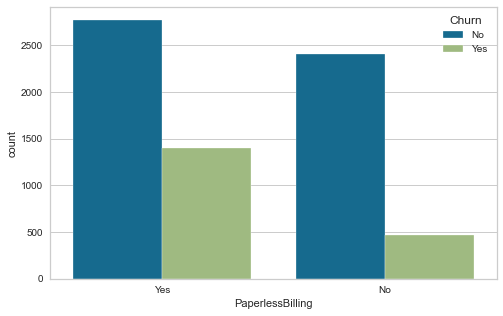

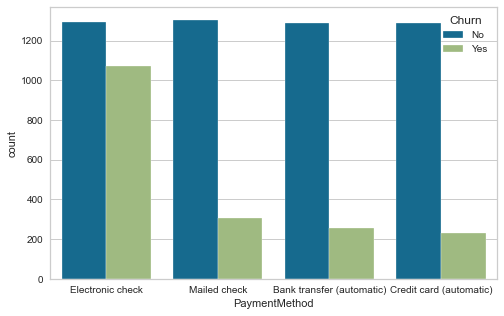

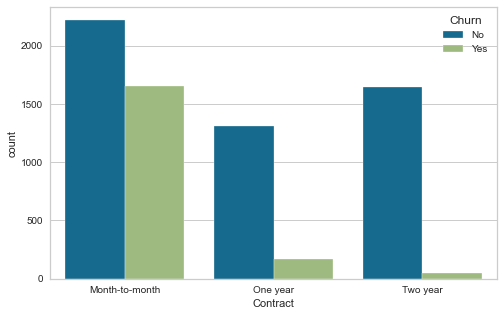

In [18]:
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents' , 'MultipleLines' ,'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies' ,'PaperlessBilling', 'PaymentMethod', 'Contract']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.show()

In [19]:
corr =df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'] , 1).apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)

<AxesSubplot:>

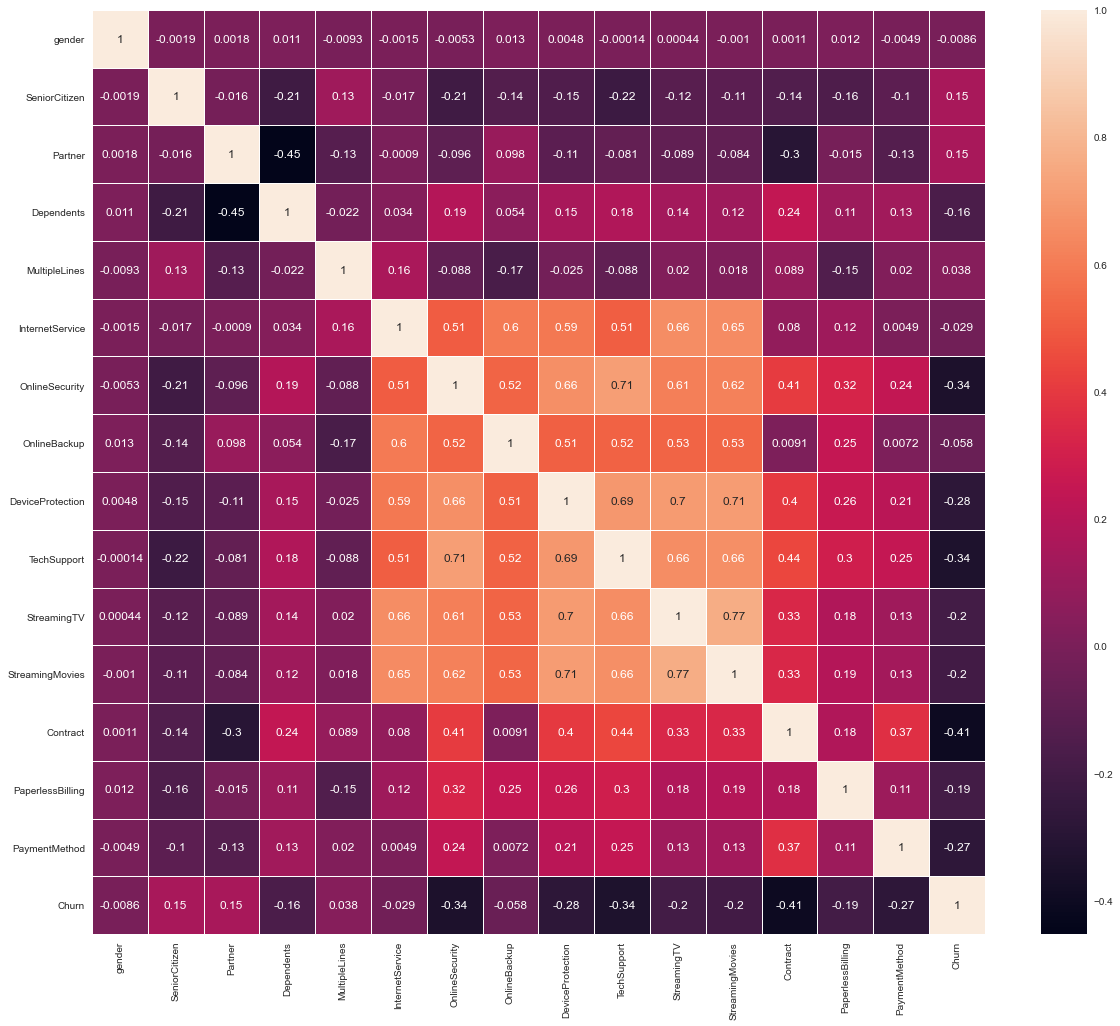

In [20]:
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

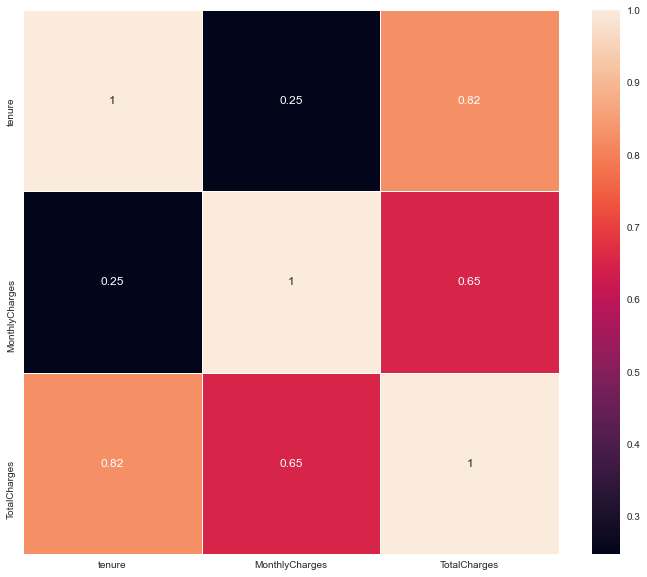

In [21]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

## hypothesis testing

In [22]:
def normality(x):
    stat, p = shapiro(df[x])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
	    print('มีการเเจกเเจงแบบปกติ')
    else:
	    print('ไม่มีการเเจกเเจงแบบปกติ')

In [23]:
def twotest(x):
    stat, p = mannwhitneyu(df[x][df['gender'] == 'Male'], df[x][df['gender'] == 'Female'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05

    if p > alpha:
	    print('กลุ่มตัวอย่าง 2 กลุ่มที่มาจากประชากรไม่เเตกต่างกัน')
    else:
	    print('กลุ่มตัวอย่าง 2 กลุ่มที่มาจากประชากรเเตกต่างกัน')


normality test

In [24]:
normality("tenure") 

Statistics=0.904, p=0.000
ไม่มีการเเจกเเจงแบบปกติ


In [25]:
normality("TotalCharges")

Statistics=0.861, p=0.000
ไม่มีการเเจกเเจงแบบปกติ


In [26]:
normality("MonthlyCharges")

Statistics=0.921, p=0.000
ไม่มีการเเจกเเจงแบบปกติ


เปรียบเทียบความเเตกต่าง 2 กลุ่ม

In [27]:
twotest("tenure")

Statistics=6174973.000, p=0.385
กลุ่มตัวอย่าง 2 กลุ่มที่มาจากประชากรไม่เเตกต่างกัน


In [28]:
twotest("TotalCharges")

Statistics=6192024.000, p=0.463
กลุ่มตัวอย่าง 2 กลุ่มที่มาจากประชากรไม่เเตกต่างกัน


In [29]:
twotest("MonthlyCharges")

Statistics=6101575.500, p=0.125
กลุ่มตัวอย่าง 2 กลุ่มที่มาจากประชากรไม่เเตกต่างกัน


# model 

https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11

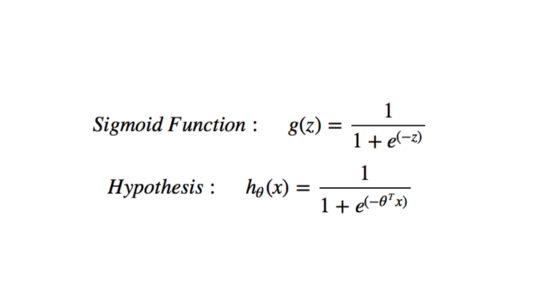

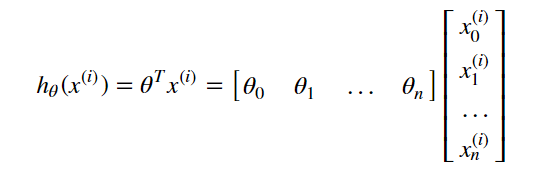

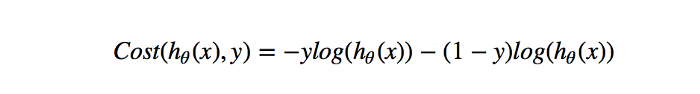

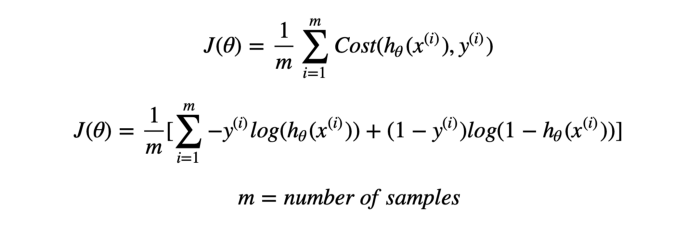

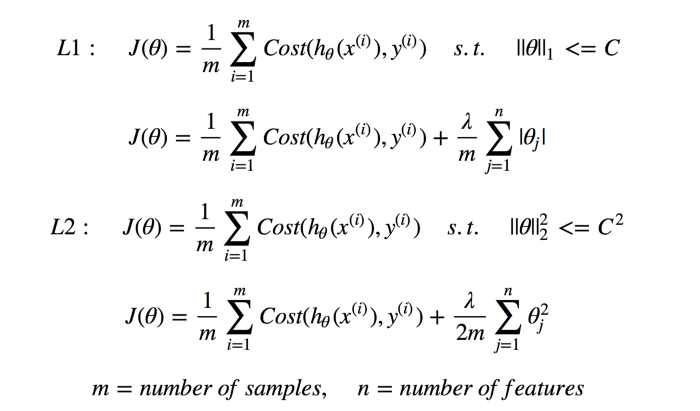

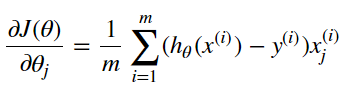

ก่อนสร้าง model  ทำการจัดการกับข้อมูลให้มีสัดส่วนเท่ากันก่อน

In [30]:
df_Yes=df[df.Churn == 'Yes']  
len(df_Yes)

1869

In [31]:
df_No = df[df.Churn == 'No'].drop_duplicates().sample(n=1869, random_state=1)
len(df_No)

1869

In [32]:
data_ML = pd.concat([df_No , df_Yes] , axis=0)

In [33]:
data_ML.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1667,Male,0,No,No,14,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),24.80,321.700012,No
2098,Male,0,No,No,2,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,No,Mailed check,90.75,174.750000,No
6598,Female,0,No,No,57,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),74.30,4166.350098,No
2450,Female,0,Yes,Yes,72,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.45,8058.850098,No
3707,Male,0,Yes,Yes,69,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.90,1356.699951,No


In [34]:
exp_clf = setup(data_ML, target = 'Churn' , normalize = True , feature_selection = True 
                , remove_multicollinearity = True, multicollinearity_threshold = 0.75 
                , remove_outliers = True )
                

,Description,Value
0,session_id,676
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(3738, 19)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=676,
                                                    

In [35]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7549,0.8308,0.7980,0.7478,0.7715,0.5077,0.5099,0.0200
lr,Logistic Regression,0.7513,0.8265,0.7724,0.7553,0.7633,0.5013,0.5022,0.4880
gbc,Gradient Boosting Classifier,0.7505,0.8269,0.7817,0.7494,0.7649,0.4993,0.5004,0.0280
catboost,CatBoost Classifier,0.7489,0.8158,0.7879,0.7449,0.7653,0.4957,0.4975,0.4100
ridge,Ridge Classifier,0.7469,0.0000,0.7817,0.7444,0.7621,0.4919,0.4935,0.0050
lda,Linear Discriminant Analysis,0.7465,0.8257,0.7809,0.7442,0.7616,0.4911,0.4927,0.0060
lightgbm,Light Gradient Boosting Machine,0.7368,0.8059,0.7678,0.7372,0.7517,0.4719,0.4729,0.0370
nb,Naive Bayes,0.7360,0.8099,0.8034,0.7214,0.7598,0.4686,0.4728,0.0050
svm,SVM - Linear Kernel,0.7328,0.0000,0.7855,0.7297,0.7522,0.4627,0.4712,0.0060
rf,Random Forest Classifier,0.7272,0.7989,0.7508,0.7331,0.7410,0.4528,0.4541,0.1100


create_model_container: 16
master_model_container: 16
display_container: 2
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=676)
compare_models() succesfully completed......................................


In [36]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7470,0.8224,0.8154,0.7310,0.7709,0.4903,0.4939
1,0.7349,0.8064,0.7538,0.7424,0.7481,0.4685,0.4685
2,0.7671,0.8317,0.7519,0.7886,0.7698,0.5343,0.5350
3,0.7711,0.8306,0.7674,0.7857,0.7765,0.5420,0.5421
4,0.7309,0.8162,0.7442,0.7385,0.7413,0.4610,0.4610
5,0.7782,0.8511,0.7829,0.7891,0.7860,0.5559,0.5559
6,0.8024,0.8820,0.8527,0.7857,0.8178,0.6028,0.6052
7,0.7097,0.7993,0.7287,0.7176,0.7231,0.4180,0.4181
8,0.7016,0.7788,0.7132,0.7132,0.7132,0.4023,0.4023
9,0.7702,0.8469,0.8140,0.7609,0.7865,0.5382,0.5397


create_model_container: 17
master_model_container: 17
display_container: 3
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=676, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
create_model() succesfully completed......................................


In [37]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7470,0.8226,0.8154,0.7310,0.7709,0.4903,0.4939
1,0.7390,0.8064,0.7462,0.7519,0.7490,0.4771,0.4771
2,0.7671,0.8318,0.7442,0.7934,0.7680,0.5346,0.5357
3,0.7751,0.8300,0.7674,0.7920,0.7795,0.5501,0.5504
4,0.7269,0.8163,0.7209,0.7440,0.7323,0.4537,0.4540
5,0.7903,0.8506,0.7829,0.8080,0.7953,0.5805,0.5808
6,0.8024,0.8819,0.8295,0.7985,0.8137,0.6035,0.6040
7,0.7097,0.7993,0.7054,0.7280,0.7165,0.4192,0.4194
8,0.7056,0.7786,0.7054,0.7222,0.7137,0.4109,0.4110
9,0.7702,0.8467,0.8062,0.7647,0.7849,0.5385,0.5394


create_model_container: 18
master_model_container: 18
display_container: 4
LogisticRegression(C=9.362, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=676, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
tune_model() succesfully completed......................................


In [38]:
tuned_lr

LogisticRegression(C=9.362, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=676, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pred_holdout = predict_model(tuned_lr)

Initializing predict_model()
predict_model(estimator=LogisticRegression(C=9.362, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=676, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7718,0.8536,0.7832,0.7724,0.7778,0.5434,0.5434


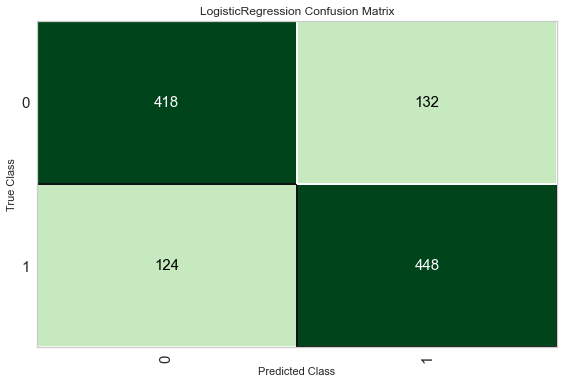

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [40]:
plot_model(tuned_lr, plot = 'confusion_matrix')

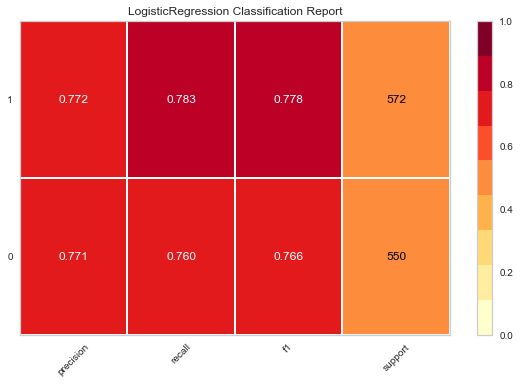

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [41]:
plot_model(tuned_lr, plot = 'class_report')

In [45]:
evaluate_model(tuned_lr)

Initializing evaluate_model()
evaluate_model(estimator=LogisticRegression(C=9.362, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=676, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
pred_holdout

,Contract_One year,Contract_Month-to-month,SeniorCitizen_1,PaymentMethod_Electronic check,Dependents_No,Contract_Two year,OnlineSecurity_No,InternetService_Fiber optic,Partner_Yes,OnlineBackup_No,...,StreamingTV_No,tenure,MultipleLines_Yes,gender_Male,StreamingMovies_No,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),Churn,Label,Score
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-0.744292,0.0,0.0,0.0,1.0,0.0,No,No,0.7092
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.026114,0.0,0.0,1.0,0.0,1.0,No,No,0.7696
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,-1.123664,0.0,0.0,1.0,0.0,0.0,No,Yes,0.6883
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.027699,0.0,1.0,0.0,0.0,0.0,No,No,0.7763
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.489792,1.0,1.0,0.0,1.0,0.0,No,No,0.9677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,-0.955054,1.0,0.0,0.0,0.0,0.0,Yes,Yes,0.9173
1118,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.081512,0.0,0.0,0.0,0.0,0.0,Yes,No,0.5231
1119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.562436,0.0,0.0,1.0,0.0,0.0,No,No,0.9036
1120,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,-0.786444,1.0,1.0,0.0,0.0,0.0,Yes,Yes,0.9244


In [44]:
final_lr = finalize_model(tuned_lr)
final_lr

Initializing finalize_model()
finalize_model(estimator=LogisticRegression(C=9.362, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=676, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None)
Finalizing LogisticRegression(C=9.362, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=676, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Initializing create_model()
create_model(estimator=LogisticRegression(C=9.362, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
             

LogisticRegression(C=9.362, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=676, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **สรุป**  

### EDA
1. ลูกค้าที่อยู่กับเราน้อย(เดือน)มีแนวโน้มที่จะเลิกใช้บริการ
2. ลูกค้าที่มีค่าบริการรายเดือนต่ำมีโอกาสที่จะใช้บริการ มากกว่าลูกค้าที่มีค่าบริการรายเดือนสูง
3. อัตราการเลิกใช้บริการ ระหว่างเพศชายและเพศหญิงมีความใกล้เคียงกัน
4. ลูกค้าที่เป็นผู้สูงอายุมีแนวโน้มที่จะเลิกใช้บริการมากกว่าลูกค้าที่ไม่เป็นผู้สูงอายุ
5. ลูกค้าที่ไม่เป็น Partner มีแนวโน้มที่จะเลิกใช้บริการ
6. ลูกค้าที่ไม่มีผู้อยู่ในอุปการะมีแนวโน้มที่จะซื่อสัตย์
7. ลูกค้าที่มี Multiple Lines เเละไม่มี Multiple Lines มีแนวโน้มที่จะเลิกใช้บริการ เท่าๆกันซึ่งมากกว่า No phone service
8. ลูกค้าที่ใช้บริการอินเทอร์เน็ตเป็น Fiber optic มีแนวโน้มที่จะเลิกใช้บริการมากที่สุด
9. ลูกค้าที่มีการเรียกเก็บเงินแบบใช้กระดาษมีแนวโน้มที่จะเลิกใช้บริการ
10. ลูกค้าที่ใช้เช็คอิเล็กทรอนิกส์ในการชำระค่าใช้จ่ายมีแนวโน้มที่จะเลิกใช้บริการ มากกว่าผู้ที่ใช้วิธีการชำระเงินแบบอื่น
11 . อัตราการเลิกใช้บริการจะลดลงเมื่อระยะเวลาของสัญญาเพิ่มขึ้น

### hypothesis testing
ระหว่างเพศชายเเละเพศหญิง พบว่า จำนวนเดือนที่ลูกค้าใช้ จำนวนเงินทั้งหมดที่เรียกเก็บจากลูกค้า เเละจำนวนเงินที่เรียกเก็บจากลูกค้ารายเดือนไม่เเตกต่างกันที่ที่ความเชื่อมั่น 95%

### model
- internertService_Fiber optic , tenure , Contract_Two year , OnlineSecurity_No มีความสำคัญในการอธิบายหรือทำนาย Churn

- internertService_Fiber optic , tenure , Contract_Two year , OnlineSecurity_No เป็นปัจจัยที่มีความสำคัญต่อการเลิกใช้บริการ (Customer Churn) 

- model จะมีค่า Accuracy ที่สูงถึง 74.42 % ส่วน Confusion Matrix จะเห็นได้ว่าการทำนายมีความเเม่นยำระดับปลานกลางไปถึงดี  ซึ่งยังสามารถดูได้จาก Class_Report ใน class 0 ,1 ของ column ของ f1-score จะได้ 74.3%เเละ 74.6% ตามลำดับ  จะทำให้ model มีประสิทธิภาพปานกลางจนถึงดีในการทำนาย Churn
